# MuseGAN Training

## imports

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import types

#from models.MuseGAN import MuseGAN
from utils.loaders import load_music


from music21 import midi
from music21 import note, stream, duration



Using TensorFlow backend.


In [2]:
# run params
SECTION = 'compose'
RUN_ID = '0018'
DATA_NAME = 'chorales'
# FILENAME = '0a4f2051b572ebe007647fcab0114dd8.npz'
FILENAME = 'Jsb16thSeparated.npz'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])



if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))
    os.mkdir(os.path.join(RUN_FOLDER, 'samples'))

mode =  'build' # ' 'load' # 

## data

In [3]:
BATCH_SIZE = 64
n_bars = 2
n_steps_per_bar = 16
n_pitches = 84
n_tracks = 4

data_binary, data_ints, raw_data = load_music(DATA_NAME, FILENAME, n_bars, n_steps_per_bar)
# data_binary = np.squeeze(data_binary)

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [10]:
print(data_binary)

[[[[[-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    ...
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]]

   [[-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    ...
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]]

   [[-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    ...
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]]

   ...

   [[-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    ...
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]]

   [[-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    ...
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]]

   [[-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    ...
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]]]


  [[[-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    ...
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.]
    [-1. -1. -1. -1.

In [11]:
import pypianoroll


In [12]:
multitrack = Multitrack(data_binary)

NameError: name 'Multitrack' is not defined

## architecture

In [8]:
gan = MuseGAN(input_dim = data_binary.shape[1:]
        , critic_learning_rate = 0.001
        , generator_learning_rate = 0.001
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 32
        , batch_size = BATCH_SIZE
        , n_tracks = n_tracks
        , n_bars = n_bars
        , n_steps_per_bar = n_steps_per_bar
        , n_pitches = n_pitches
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:                 
    gan.load_weights(RUN_FOLDER)

In [9]:
gan.chords_tempNetwork.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
temporal_input (InputLayer)  (None, 32)                0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 2, 1, 1024)        66560     
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 1, 1024)        4096      
_________________________________________________________________
activation_1 (Activation)    (None, 2, 1, 1024)        0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 2, 1, 32)          32800     
_________________________________________________________________
batch_normalization_2 (Batch (None, 2, 1, 32)          128       
__________

In [10]:
gan.barGen[0].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bar_generator_input (InputLa (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              132096    
_________________________________________________________________
batch_normalization_11 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_11 (Activation)   (None, 1024)              0         
_________________________________________________________________
reshape_11 (Reshape)         (None, 2, 1, 512)         0         
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 4, 1, 512)         524800    
_________________________________________________________________
batch_normalization_12 (Batc (None, 4, 1, 512)         2048      
__________

In [11]:
gan.generator.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
melody_input (InputLayer)       (None, 4, 32)        0                                            
__________________________________________________________________________________________________
chords_input (InputLayer)       (None, 32)           0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 32)           0           melody_input[0][0]               
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 32)           0           melody_input[0][0]               
__________________________________________________________________________________________________
lambda_3 (

In [12]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 2, 16, 84, 4)      0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 1, 16, 84, 128)    1152      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 16, 84, 128)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 1, 16, 84, 128)    16512     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1, 16, 84, 128)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 1, 16, 7, 128)     196736    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1, 16, 7, 128)     0         
__________

## training

In [13]:

EPOCHS = 6000 
# 6000
PRINT_EVERY_N_BATCHES = 10

gan.epoch = 0

In [14]:
gan.train(     
    data_binary
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\Lrozm\Anaconda3\envs\tf_retry\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Lrozm\Anaconda3\envs\tf_retry\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 (5, 1) [D loss: (9.6)(R -0.3, F -0.0, G 1.0)] [G loss: 0.1]


C:\Users\Lrozm\Anaconda3\envs\tf_retry\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 (5, 1) [D loss: (-216.1)(R -297.6, F 42.9, G 3.9)] [G loss: -52.0]
2 (5, 1) [D loss: (-228.9)(R -583.1, F 116.4, G 23.8)] [G loss: -59.2]
3 (5, 1) [D loss: (-149.3)(R -108.0, F -190.8, G 14.9)] [G loss: 179.3]
4 (5, 1) [D loss: (-128.4)(R -276.5, F 120.3, G 2.8)] [G loss: -267.0]
5 (5, 1) [D loss: (-100.0)(R -387.8, F 230.1, G 5.8)] [G loss: -215.2]
6 (5, 1) [D loss: (-56.0)(R -150.2, F 17.4, G 7.7)] [G loss: 837.3]
7 (5, 1) [D loss: (-59.2)(R 234.7, F -301.7, G 0.8)] [G loss: 423.4]
8 (5, 1) [D loss: (-45.4)(R 195.7, F -262.7, G 2.2)] [G loss: 265.4]
9 (5, 1) [D loss: (-22.5)(R 154.0, F -181.0, G 0.5)] [G loss: 202.8]
10 (5, 1) [D loss: (-11.3)(R 133.9, F -146.3, G 0.1)] [G loss: 156.9]
11 (5, 1) [D loss: (-1.2)(R 108.5, F -109.8, G 0.0)] [G loss: 120.3]
12 (5, 1) [D loss: (3.9)(R 111.2, F -108.8, G 0.1)] [G loss: 120.7]
13 (5, 1) [D loss: (1.0)(R 186.2, F -185.7, G 0.0)] [G loss: 243.6]
14 (5, 1) [D loss: (-22.3)(R 414.0, F -444.4, G 0.8)] [G loss: 384.1]
15 (5, 1) [D loss: (-12.2)

119 (5, 1) [D loss: (-27.6)(R 69.9, F -107.8, G 1.0)] [G loss: 96.2]
120 (5, 1) [D loss: (-27.2)(R 89.7, F -127.1, G 1.0)] [G loss: 131.8]
121 (5, 1) [D loss: (-26.9)(R 107.2, F -141.7, G 0.8)] [G loss: 188.3]
122 (5, 1) [D loss: (-27.3)(R 94.1, F -133.2, G 1.2)] [G loss: 97.7]
123 (5, 1) [D loss: (-25.7)(R 87.3, F -118.6, G 0.6)] [G loss: 149.0]
124 (5, 1) [D loss: (-25.3)(R 138.0, F -170.7, G 0.7)] [G loss: 190.0]
125 (5, 1) [D loss: (-25.1)(R 150.1, F -180.4, G 0.5)] [G loss: 268.2]
126 (5, 1) [D loss: (-24.5)(R 106.2, F -137.5, G 0.7)] [G loss: 148.5]
127 (5, 1) [D loss: (-24.6)(R 124.5, F -161.2, G 1.2)] [G loss: 181.0]
128 (5, 1) [D loss: (-24.8)(R 172.5, F -205.0, G 0.8)] [G loss: 228.0]
129 (5, 1) [D loss: (-24.2)(R 126.8, F -157.2, G 0.6)] [G loss: 233.5]
130 (5, 1) [D loss: (-23.2)(R 48.5, F -75.4, G 0.4)] [G loss: 125.1]
131 (5, 1) [D loss: (-25.0)(R 209.6, F -240.4, G 0.6)] [G loss: 242.6]
132 (5, 1) [D loss: (-24.8)(R 143.9, F -177.5, G 0.9)] [G loss: 180.5]
133 (5, 1) [D 

237 (5, 1) [D loss: (-20.3)(R 45.6, F -68.4, G 0.3)] [G loss: 116.3]
238 (5, 1) [D loss: (-21.7)(R 171.3, F -199.2, G 0.6)] [G loss: 190.9]
239 (5, 1) [D loss: (-19.6)(R 15.1, F -40.3, G 0.6)] [G loss: 49.9]
240 (5, 1) [D loss: (-21.0)(R 62.6, F -91.8, G 0.8)] [G loss: 84.4]
241 (5, 1) [D loss: (-20.3)(R 59.8, F -85.7, G 0.6)] [G loss: 90.1]
242 (5, 1) [D loss: (-21.0)(R 110.3, F -139.1, G 0.8)] [G loss: 123.5]
243 (5, 1) [D loss: (-18.7)(R 82.3, F -102.1, G 0.1)] [G loss: 183.7]
244 (5, 1) [D loss: (-19.9)(R -7.3, F -21.2, G 0.9)] [G loss: 41.9]
245 (5, 1) [D loss: (-21.1)(R 47.9, F -78.1, G 0.9)] [G loss: 53.8]
246 (5, 1) [D loss: (-20.1)(R 64.4, F -91.2, G 0.7)] [G loss: 83.0]
247 (5, 1) [D loss: (-20.4)(R 108.7, F -136.2, G 0.7)] [G loss: 114.7]
248 (5, 1) [D loss: (-20.3)(R 62.2, F -87.6, G 0.5)] [G loss: 118.0]
249 (5, 1) [D loss: (-20.1)(R 92.7, F -115.9, G 0.3)] [G loss: 140.2]
250 (5, 1) [D loss: (-20.4)(R 48.9, F -77.1, G 0.8)] [G loss: 73.7]
251 (5, 1) [D loss: (-19.9)(R 97.

356 (5, 1) [D loss: (-21.2)(R 2.4, F -26.3, G 0.3)] [G loss: 51.4]
357 (5, 1) [D loss: (-21.9)(R 52.0, F -82.6, G 0.9)] [G loss: 47.9]
358 (5, 1) [D loss: (-21.5)(R 32.5, F -58.9, G 0.5)] [G loss: 80.1]
359 (5, 1) [D loss: (-21.0)(R 27.3, F -51.1, G 0.3)] [G loss: 60.4]
360 (5, 1) [D loss: (-21.0)(R 68.6, F -96.2, G 0.7)] [G loss: 82.3]
361 (5, 1) [D loss: (-21.7)(R 18.7, F -45.3, G 0.5)] [G loss: 50.9]
362 (5, 1) [D loss: (-21.2)(R 67.3, F -90.7, G 0.2)] [G loss: 131.7]
363 (5, 1) [D loss: (-22.2)(R 77.5, F -105.6, G 0.6)] [G loss: 128.9]
364 (5, 1) [D loss: (-21.1)(R 67.6, F -92.1, G 0.3)] [G loss: 70.4]
365 (5, 1) [D loss: (-19.3)(R 157.0, F -192.4, G 1.6)] [G loss: 76.0]
366 (5, 1) [D loss: (-22.0)(R 45.9, F -71.5, G 0.4)] [G loss: 67.9]
367 (5, 1) [D loss: (-21.3)(R 67.9, F -95.8, G 0.7)] [G loss: 72.5]
368 (5, 1) [D loss: (-21.7)(R 53.3, F -80.7, G 0.6)] [G loss: 91.6]
369 (5, 1) [D loss: (-20.8)(R 23.6, F -51.3, G 0.7)] [G loss: 18.8]
370 (5, 1) [D loss: (-21.4)(R 18.4, F -48.8,

477 (5, 1) [D loss: (-22.1)(R 18.0, F -44.2, G 0.4)] [G loss: 42.2]
478 (5, 1) [D loss: (-22.8)(R 10.8, F -42.8, G 0.9)] [G loss: 28.6]
479 (5, 1) [D loss: (-21.9)(R -4.7, F -29.0, G 1.2)] [G loss: 35.1]
480 (5, 1) [D loss: (-22.5)(R -14.7, F -13.9, G 0.6)] [G loss: 16.0]
481 (5, 1) [D loss: (-22.4)(R -2.2, F -25.3, G 0.5)] [G loss: 30.7]
482 (5, 1) [D loss: (-23.1)(R -0.6, F -29.6, G 0.7)] [G loss: 39.6]
483 (5, 1) [D loss: (-22.6)(R -20.6, F -8.8, G 0.7)] [G loss: 2.3]
484 (5, 1) [D loss: (-21.1)(R 5.9, F -29.1, G 0.2)] [G loss: 27.8]
485 (5, 1) [D loss: (-22.5)(R -1.1, F -27.5, G 0.6)] [G loss: 32.8]
486 (5, 1) [D loss: (-20.8)(R -5.5, F -17.4, G 0.2)] [G loss: 34.5]
487 (5, 1) [D loss: (-23.4)(R -3.0, F -28.4, G 0.8)] [G loss: 22.8]
488 (5, 1) [D loss: (-22.1)(R -4.5, F -25.3, G 0.8)] [G loss: 17.5]
489 (5, 1) [D loss: (-22.8)(R 15.3, F -44.1, G 0.6)] [G loss: 43.9]
490 (5, 1) [D loss: (-22.5)(R -5.2, F -25.9, G 0.9)] [G loss: 39.8]
491 (5, 1) [D loss: (-21.7)(R -12.5, F -21.0, G 1

598 (5, 1) [D loss: (-22.4)(R 4.7, F -33.1, G 0.6)] [G loss: 45.8]
599 (5, 1) [D loss: (-23.5)(R -25.2, F -3.7, G 0.5)] [G loss: 13.9]
600 (5, 1) [D loss: (-22.5)(R -20.6, F -4.9, G 0.3)] [G loss: 6.5]
601 (5, 1) [D loss: (-20.9)(R -20.9, F -10.1, G 1.0)] [G loss: 5.3]
602 (5, 1) [D loss: (-23.2)(R 0.8, F -31.8, G 0.8)] [G loss: 23.3]
603 (5, 1) [D loss: (-22.7)(R -6.8, F -20.8, G 0.5)] [G loss: 21.3]
604 (5, 1) [D loss: (-21.8)(R -13.5, F -10.8, G 0.3)] [G loss: 7.7]
605 (5, 1) [D loss: (-22.0)(R -8.0, F -26.3, G 1.2)] [G loss: 17.5]
606 (5, 1) [D loss: (-22.0)(R -15.0, F -14.0, G 0.7)] [G loss: 11.6]
607 (5, 1) [D loss: (-22.5)(R -19.0, F -8.7, G 0.5)] [G loss: 12.4]
608 (5, 1) [D loss: (-23.8)(R -13.5, F -16.7, G 0.6)] [G loss: 22.7]
609 (5, 1) [D loss: (-22.0)(R -7.9, F -17.9, G 0.4)] [G loss: 25.3]
610 (5, 1) [D loss: (-23.1)(R 11.4, F -43.7, G 0.9)] [G loss: 29.7]
611 (5, 1) [D loss: (-22.4)(R -13.3, F -17.5, G 0.8)] [G loss: 30.9]
612 (5, 1) [D loss: (-23.3)(R -19.6, F -12.8, G 

719 (5, 1) [D loss: (-22.7)(R -15.8, F -12.3, G 0.5)] [G loss: 15.1]
720 (5, 1) [D loss: (-23.6)(R -1.1, F -29.7, G 0.7)] [G loss: 23.4]
721 (5, 1) [D loss: (-22.9)(R -12.2, F -21.1, G 1.1)] [G loss: 20.1]
722 (5, 1) [D loss: (-22.6)(R -20.2, F -10.7, G 0.8)] [G loss: 14.9]
723 (5, 1) [D loss: (-22.8)(R -20.1, F -12.5, G 1.0)] [G loss: 13.8]
724 (5, 1) [D loss: (-23.1)(R -11.5, F -23.1, G 1.2)] [G loss: 26.4]
725 (5, 1) [D loss: (-22.9)(R -17.4, F -13.2, G 0.8)] [G loss: 19.9]
726 (5, 1) [D loss: (-23.1)(R -27.5, F -7.0, G 1.1)] [G loss: 13.1]
727 (5, 1) [D loss: (-23.2)(R -25.8, F -3.1, G 0.6)] [G loss: 11.6]
728 (5, 1) [D loss: (-21.8)(R -2.3, F -22.6, G 0.3)] [G loss: 16.3]
729 (5, 1) [D loss: (-23.2)(R -2.3, F -24.9, G 0.4)] [G loss: 33.9]
730 (5, 1) [D loss: (-23.8)(R -36.9, F 4.8, G 0.8)] [G loss: -6.9]
731 (5, 1) [D loss: (-24.3)(R -30.2, F -1.8, G 0.8)] [G loss: 4.8]
732 (5, 1) [D loss: (-22.7)(R -13.7, F -17.3, G 0.8)] [G loss: 14.1]
733 (5, 1) [D loss: (-22.7)(R -3.4, F -31.4

839 (5, 1) [D loss: (-24.5)(R -13.8, F -17.5, G 0.7)] [G loss: 24.8]
840 (5, 1) [D loss: (-24.6)(R -7.2, F -25.5, G 0.8)] [G loss: 19.9]
841 (5, 1) [D loss: (-23.8)(R -21.8, F -11.0, G 0.9)] [G loss: 5.8]
842 (5, 1) [D loss: (-24.5)(R -17.0, F -12.6, G 0.5)] [G loss: 13.2]
843 (5, 1) [D loss: (-22.3)(R -11.0, F -14.3, G 0.3)] [G loss: 2.8]
844 (5, 1) [D loss: (-23.7)(R -17.0, F -20.0, G 1.3)] [G loss: 17.6]
845 (5, 1) [D loss: (-23.7)(R -21.4, F -11.9, G 1.0)] [G loss: 11.0]
846 (5, 1) [D loss: (-24.2)(R -20.3, F -8.3, G 0.4)] [G loss: 9.9]
847 (5, 1) [D loss: (-24.3)(R -24.8, F -8.8, G 0.9)] [G loss: 11.6]
848 (5, 1) [D loss: (-24.9)(R -20.6, F -14.2, G 1.0)] [G loss: 15.0]
849 (5, 1) [D loss: (-24.6)(R -9.7, F -21.2, G 0.6)] [G loss: 23.6]
850 (5, 1) [D loss: (-23.9)(R -21.3, F -12.0, G 0.9)] [G loss: 16.6]
851 (5, 1) [D loss: (-23.2)(R -13.8, F -15.5, G 0.6)] [G loss: 14.3]
852 (5, 1) [D loss: (-24.2)(R -11.8, F -23.6, G 1.1)] [G loss: 17.9]
853 (5, 1) [D loss: (-25.1)(R -13.6, F -1

959 (5, 1) [D loss: (-24.3)(R -19.8, F -9.2, G 0.5)] [G loss: 12.8]
960 (5, 1) [D loss: (-20.7)(R -14.4, F -23.8, G 1.8)] [G loss: 9.5]
961 (5, 1) [D loss: (-24.4)(R -11.2, F -17.3, G 0.4)] [G loss: 15.0]
962 (5, 1) [D loss: (-25.9)(R -19.4, F -15.1, G 0.9)] [G loss: 14.9]
963 (5, 1) [D loss: (-25.0)(R -21.4, F -11.5, G 0.8)] [G loss: 13.6]
964 (5, 1) [D loss: (-24.4)(R -20.6, F -11.8, G 0.8)] [G loss: 14.6]
965 (5, 1) [D loss: (-26.1)(R -18.0, F -17.5, G 0.9)] [G loss: 16.0]
966 (5, 1) [D loss: (-25.0)(R -18.3, F -13.8, G 0.7)] [G loss: 17.9]
967 (5, 1) [D loss: (-24.6)(R -14.3, F -14.7, G 0.4)] [G loss: 15.5]
968 (5, 1) [D loss: (-24.1)(R -13.8, F -16.5, G 0.6)] [G loss: 14.6]
969 (5, 1) [D loss: (-24.1)(R -19.9, F -10.2, G 0.6)] [G loss: 7.9]
970 (5, 1) [D loss: (-25.1)(R -17.1, F -16.5, G 0.9)] [G loss: 17.1]
971 (5, 1) [D loss: (-24.1)(R -14.5, F -15.2, G 0.6)] [G loss: 20.4]
972 (5, 1) [D loss: (-25.4)(R -22.8, F -11.9, G 0.9)] [G loss: 12.1]
973 (5, 1) [D loss: (-26.0)(R -24.1, 

1078 (5, 1) [D loss: (-25.0)(R -25.9, F -9.1, G 1.0)] [G loss: 9.2]
1079 (5, 1) [D loss: (-26.2)(R -26.2, F -9.2, G 0.9)] [G loss: 11.0]
1080 (5, 1) [D loss: (-25.3)(R -24.4, F -8.5, G 0.8)] [G loss: 8.2]
1081 (5, 1) [D loss: (-25.9)(R -23.5, F -7.8, G 0.5)] [G loss: 6.8]
1082 (5, 1) [D loss: (-25.6)(R -25.2, F -5.2, G 0.5)] [G loss: 7.0]
1083 (5, 1) [D loss: (-24.4)(R -29.7, F -5.2, G 1.0)] [G loss: 6.6]
1084 (5, 1) [D loss: (-25.0)(R -24.1, F -9.3, G 0.8)] [G loss: 9.2]
1085 (5, 1) [D loss: (-25.2)(R -37.1, F -3.9, G 1.6)] [G loss: 13.6]
1086 (5, 1) [D loss: (-26.2)(R -30.4, F -4.0, G 0.8)] [G loss: 7.6]
1087 (5, 1) [D loss: (-24.8)(R -30.6, F -5.5, G 1.1)] [G loss: 3.4]
1088 (5, 1) [D loss: (-26.3)(R -25.7, F -8.5, G 0.8)] [G loss: 4.6]
1089 (5, 1) [D loss: (-25.9)(R -27.5, F -6.1, G 0.8)] [G loss: 9.4]
1090 (5, 1) [D loss: (-24.9)(R -22.2, F -8.0, G 0.5)] [G loss: 7.7]
1091 (5, 1) [D loss: (-25.6)(R -25.7, F -9.7, G 1.0)] [G loss: 11.9]
1092 (5, 1) [D loss: (-25.9)(R -21.9, F -12.0

1199 (5, 1) [D loss: (-25.6)(R -34.2, F -3.1, G 1.2)] [G loss: 4.6]
1200 (5, 1) [D loss: (-25.4)(R -30.1, F -3.0, G 0.8)] [G loss: 3.5]
1201 (5, 1) [D loss: (-25.3)(R -28.5, F -3.3, G 0.6)] [G loss: 3.9]
1202 (5, 1) [D loss: (-25.4)(R -34.3, F -2.3, G 1.1)] [G loss: 5.4]
1203 (5, 1) [D loss: (-25.8)(R -27.3, F -5.8, G 0.7)] [G loss: 4.2]
1204 (5, 1) [D loss: (-25.1)(R -32.1, F -1.7, G 0.9)] [G loss: 3.3]
1205 (5, 1) [D loss: (-25.3)(R -37.5, F 0.2, G 1.2)] [G loss: 4.9]
1206 (5, 1) [D loss: (-25.5)(R -33.2, F -1.0, G 0.9)] [G loss: -5.9]
1207 (5, 1) [D loss: (-25.1)(R -32.6, F -1.9, G 0.9)] [G loss: 1.9]
1208 (5, 1) [D loss: (-25.4)(R -30.0, F -4.1, G 0.9)] [G loss: 2.3]
1209 (5, 1) [D loss: (-24.8)(R -34.6, F -2.0, G 1.2)] [G loss: 4.4]
1210 (5, 1) [D loss: (-25.1)(R -34.7, F -3.3, G 1.3)] [G loss: 5.5]
1211 (5, 1) [D loss: (-24.8)(R -33.2, F -0.2, G 0.9)] [G loss: 4.3]
1212 (5, 1) [D loss: (-24.7)(R -40.5, F 2.2, G 1.4)] [G loss: 3.9]
1213 (5, 1) [D loss: (-25.9)(R -35.3, F 0.1, G 0.

1320 (5, 1) [D loss: (-24.4)(R -33.8, F -1.8, G 1.1)] [G loss: 1.0]
1321 (5, 1) [D loss: (-25.8)(R -32.6, F -0.1, G 0.7)] [G loss: -1.7]
1322 (5, 1) [D loss: (-24.9)(R -36.0, F 2.8, G 0.8)] [G loss: 0.3]
1323 (5, 1) [D loss: (-25.0)(R -24.5, F -5.4, G 0.5)] [G loss: 2.9]
1324 (5, 1) [D loss: (-24.9)(R -32.1, F -2.3, G 0.9)] [G loss: 4.3]
1325 (5, 1) [D loss: (-25.6)(R -30.7, F -0.1, G 0.5)] [G loss: 0.2]
1326 (5, 1) [D loss: (-25.6)(R -34.0, F 0.4, G 0.8)] [G loss: 1.6]
1327 (5, 1) [D loss: (-25.3)(R -31.0, F 0.1, G 0.6)] [G loss: 0.0]
1328 (5, 1) [D loss: (-25.7)(R -31.5, F 0.4, G 0.5)] [G loss: -1.4]
1329 (5, 1) [D loss: (-24.0)(R -26.2, F -2.5, G 0.5)] [G loss: -1.3]
1330 (5, 1) [D loss: (-25.0)(R -30.2, F -7.7, G 1.3)] [G loss: 0.3]
1331 (5, 1) [D loss: (-25.8)(R -29.1, F -2.4, G 0.6)] [G loss: 3.1]
1332 (5, 1) [D loss: (-26.3)(R -29.7, F -2.9, G 0.6)] [G loss: 2.3]
1333 (5, 1) [D loss: (-26.2)(R -30.5, F -3.4, G 0.8)] [G loss: 2.4]
1334 (5, 1) [D loss: (-26.5)(R -35.3, F 3.1, G 0.

1441 (5, 1) [D loss: (-24.4)(R -41.7, F 2.2, G 1.5)] [G loss: -1.5]
1442 (5, 1) [D loss: (-25.6)(R -31.0, F -1.7, G 0.7)] [G loss: -4.2]
1443 (5, 1) [D loss: (-26.8)(R -31.8, F -1.4, G 0.6)] [G loss: 1.4]
1444 (5, 1) [D loss: (-26.6)(R -33.3, F 0.8, G 0.6)] [G loss: 0.7]
1445 (5, 1) [D loss: (-25.5)(R -34.9, F 1.3, G 0.8)] [G loss: 0.6]
1446 (5, 1) [D loss: (-25.5)(R -35.5, F -0.0, G 1.0)] [G loss: 2.2]
1447 (5, 1) [D loss: (-25.8)(R -33.1, F 2.8, G 0.4)] [G loss: 0.3]
1448 (5, 1) [D loss: (-24.9)(R -37.2, F 1.9, G 1.0)] [G loss: -3.8]
1449 (5, 1) [D loss: (-25.5)(R -32.0, F -1.7, G 0.8)] [G loss: 3.0]
1450 (5, 1) [D loss: (-25.5)(R -34.7, F -0.4, G 1.0)] [G loss: -1.7]
1451 (5, 1) [D loss: (-24.3)(R -33.7, F -2.1, G 1.2)] [G loss: 0.4]
1452 (5, 1) [D loss: (-25.8)(R -34.1, F 1.1, G 0.7)] [G loss: 1.4]
1453 (5, 1) [D loss: (-25.7)(R -34.4, F 2.3, G 0.6)] [G loss: -2.0]
1454 (5, 1) [D loss: (-25.7)(R -33.3, F 1.0, G 0.7)] [G loss: -2.8]
1455 (5, 1) [D loss: (-25.7)(R -36.7, F 1.6, G 0.9

1562 (5, 1) [D loss: (-26.0)(R -33.4, F 3.1, G 0.4)] [G loss: -3.1]
1563 (5, 1) [D loss: (-26.8)(R -35.5, F 0.2, G 0.9)] [G loss: -0.7]
1564 (5, 1) [D loss: (-26.0)(R -29.6, F -1.2, G 0.5)] [G loss: -0.4]
1565 (5, 1) [D loss: (-26.0)(R -36.5, F 0.0, G 1.0)] [G loss: 3.1]
1566 (5, 1) [D loss: (-26.4)(R -38.6, F 1.2, G 1.1)] [G loss: -0.7]
1567 (5, 1) [D loss: (-25.2)(R -35.2, F -0.9, G 1.1)] [G loss: -1.1]
1568 (5, 1) [D loss: (-25.6)(R -29.8, F -2.5, G 0.7)] [G loss: -0.6]
1569 (5, 1) [D loss: (-25.4)(R -28.7, F -2.5, G 0.6)] [G loss: -2.8]
1570 (5, 1) [D loss: (-25.4)(R -28.4, F -1.9, G 0.5)] [G loss: -2.2]
1571 (5, 1) [D loss: (-26.0)(R -37.9, F 2.8, G 0.9)] [G loss: -1.1]
1572 (5, 1) [D loss: (-25.2)(R -38.0, F 1.9, G 1.1)] [G loss: -1.6]
1573 (5, 1) [D loss: (-25.6)(R -34.0, F -1.1, G 0.9)] [G loss: 0.9]
1574 (5, 1) [D loss: (-25.6)(R -37.8, F 1.2, G 1.1)] [G loss: 1.4]
1575 (5, 1) [D loss: (-24.2)(R -41.4, F 3.4, G 1.4)] [G loss: -1.3]
1576 (5, 1) [D loss: (-26.7)(R -34.6, F -0.0,

1683 (5, 1) [D loss: (-25.4)(R -37.1, F 4.8, G 0.7)] [G loss: -3.2]
1684 (5, 1) [D loss: (-25.8)(R -41.4, F 3.2, G 1.2)] [G loss: -1.0]
1685 (5, 1) [D loss: (-25.1)(R -33.5, F 0.3, G 0.8)] [G loss: 0.0]
1686 (5, 1) [D loss: (-26.1)(R -32.1, F 1.1, G 0.5)] [G loss: -2.0]
1687 (5, 1) [D loss: (-25.7)(R -36.5, F -0.4, G 1.1)] [G loss: -0.6]
1688 (5, 1) [D loss: (-26.3)(R -36.0, F -0.8, G 1.1)] [G loss: -0.9]
1689 (5, 1) [D loss: (-26.9)(R -34.9, F 0.1, G 0.8)] [G loss: 3.3]
1690 (5, 1) [D loss: (-26.1)(R -35.6, F 1.0, G 0.9)] [G loss: -0.1]
1691 (5, 1) [D loss: (-25.8)(R -38.0, F 1.3, G 1.1)] [G loss: 1.3]
1692 (5, 1) [D loss: (-25.8)(R -38.1, F 3.2, G 0.9)] [G loss: -2.6]
1693 (5, 1) [D loss: (-26.3)(R -34.0, F 0.4, G 0.7)] [G loss: -2.1]
1694 (5, 1) [D loss: (-25.6)(R -39.5, F 2.3, G 1.2)] [G loss: -1.8]
1695 (5, 1) [D loss: (-25.9)(R -31.3, F -3.0, G 0.8)] [G loss: -2.1]
1696 (5, 1) [D loss: (-26.2)(R -33.1, F 0.6, G 0.6)] [G loss: -0.7]
1697 (5, 1) [D loss: (-25.7)(R -39.3, F 4.3, G 0

1804 (5, 1) [D loss: (-26.6)(R -37.3, F -1.1, G 1.2)] [G loss: 0.2]
1805 (5, 1) [D loss: (-26.0)(R -34.7, F 1.9, G 0.7)] [G loss: -1.1]
1806 (5, 1) [D loss: (-26.5)(R -37.2, F -0.2, G 1.1)] [G loss: 0.1]
1807 (5, 1) [D loss: (-26.7)(R -36.0, F 0.9, G 0.8)] [G loss: -0.4]
1808 (5, 1) [D loss: (-26.5)(R -38.3, F 4.3, G 0.7)] [G loss: -6.1]
1809 (5, 1) [D loss: (-27.0)(R -34.0, F 0.6, G 0.6)] [G loss: -0.8]
1810 (5, 1) [D loss: (-25.4)(R -43.8, F 2.4, G 1.6)] [G loss: 0.4]
1811 (5, 1) [D loss: (-26.2)(R -36.0, F 1.9, G 0.8)] [G loss: -3.1]
1812 (5, 1) [D loss: (-26.9)(R -36.5, F 1.3, G 0.8)] [G loss: 0.2]
1813 (5, 1) [D loss: (-25.0)(R -40.3, F 4.5, G 1.1)] [G loss: -1.0]
1814 (5, 1) [D loss: (-26.6)(R -38.8, F 3.0, G 0.9)] [G loss: -5.1]
1815 (5, 1) [D loss: (-26.9)(R -36.5, F -1.7, G 1.1)] [G loss: -2.3]
1816 (5, 1) [D loss: (-27.0)(R -39.5, F 2.1, G 1.0)] [G loss: 1.5]
1817 (5, 1) [D loss: (-25.7)(R -44.4, F 3.9, G 1.5)] [G loss: -1.5]
1818 (5, 1) [D loss: (-25.5)(R -34.2, F 1.8, G 0.7

1925 (5, 1) [D loss: (-26.5)(R -36.2, F 1.7, G 0.8)] [G loss: -2.7]
1926 (5, 1) [D loss: (-27.5)(R -42.9, F 2.8, G 1.3)] [G loss: -0.3]
1927 (5, 1) [D loss: (-26.9)(R -39.3, F 1.4, G 1.1)] [G loss: -3.0]
1928 (5, 1) [D loss: (-26.1)(R -37.7, F 3.6, G 0.8)] [G loss: -1.4]
1929 (5, 1) [D loss: (-27.8)(R -40.0, F 3.7, G 0.9)] [G loss: -3.0]
1930 (5, 1) [D loss: (-26.7)(R -31.6, F -2.2, G 0.7)] [G loss: -0.5]
1931 (5, 1) [D loss: (-25.8)(R -40.2, F 2.7, G 1.2)] [G loss: -2.6]
1932 (5, 1) [D loss: (-26.6)(R -40.0, F 2.9, G 1.1)] [G loss: -3.0]
1933 (5, 1) [D loss: (-26.4)(R -35.0, F 0.8, G 0.8)] [G loss: -3.4]
1934 (5, 1) [D loss: (-25.8)(R -39.9, F 2.2, G 1.2)] [G loss: -0.1]
1935 (5, 1) [D loss: (-25.9)(R -35.6, F 0.8, G 0.9)] [G loss: 0.9]
1936 (5, 1) [D loss: (-27.0)(R -38.0, F 2.9, G 0.8)] [G loss: -2.3]
1937 (5, 1) [D loss: (-25.8)(R -36.6, F 3.5, G 0.7)] [G loss: -1.8]
1938 (5, 1) [D loss: (-27.5)(R -40.0, F 3.5, G 0.9)] [G loss: -4.4]
1939 (5, 1) [D loss: (-25.6)(R -28.3, F -2.7, G 

2046 (5, 1) [D loss: (-25.9)(R -37.7, F 2.0, G 1.0)] [G loss: -0.9]
2047 (5, 1) [D loss: (-26.4)(R -37.5, F 0.5, G 1.1)] [G loss: -0.5]
2048 (5, 1) [D loss: (-25.9)(R -40.4, F 3.3, G 1.1)] [G loss: -2.3]
2049 (5, 1) [D loss: (-26.6)(R -35.6, F 1.1, G 0.8)] [G loss: -2.3]
2050 (5, 1) [D loss: (-26.5)(R -36.5, F 1.9, G 0.8)] [G loss: -4.0]
2051 (5, 1) [D loss: (-26.3)(R -43.3, F 4.7, G 1.2)] [G loss: -2.1]
2052 (5, 1) [D loss: (-27.2)(R -36.1, F 0.9, G 0.8)] [G loss: -3.7]
2053 (5, 1) [D loss: (-27.3)(R -38.2, F 1.0, G 1.0)] [G loss: -3.9]
2054 (5, 1) [D loss: (-26.9)(R -37.7, F 3.6, G 0.7)] [G loss: -1.9]
2055 (5, 1) [D loss: (-27.7)(R -38.2, F 2.3, G 0.8)] [G loss: -1.4]
2056 (5, 1) [D loss: (-27.2)(R -39.1, F 1.2, G 1.1)] [G loss: 1.7]
2057 (5, 1) [D loss: (-25.7)(R -39.9, F 1.8, G 1.2)] [G loss: -2.0]
2058 (5, 1) [D loss: (-26.5)(R -37.8, F 0.4, G 1.1)] [G loss: 0.4]
2059 (5, 1) [D loss: (-26.5)(R -35.5, F 1.0, G 0.8)] [G loss: -0.4]
2060 (5, 1) [D loss: (-26.2)(R -31.3, F 0.6, G 0.4

2167 (5, 1) [D loss: (-26.5)(R -40.6, F 2.0, G 1.2)] [G loss: 0.7]
2168 (5, 1) [D loss: (-26.0)(R -39.4, F 4.0, G 0.9)] [G loss: -2.8]
2169 (5, 1) [D loss: (-26.7)(R -36.9, F 3.5, G 0.7)] [G loss: -6.5]
2170 (5, 1) [D loss: (-26.4)(R -45.4, F 6.9, G 1.2)] [G loss: -2.8]
2171 (5, 1) [D loss: (-26.1)(R -31.7, F 0.5, G 0.5)] [G loss: -2.1]
2172 (5, 1) [D loss: (-27.1)(R -39.7, F 3.7, G 0.9)] [G loss: -1.9]
2173 (5, 1) [D loss: (-26.6)(R -42.7, F 4.1, G 1.2)] [G loss: 0.1]
2174 (5, 1) [D loss: (-26.3)(R -39.4, F 4.0, G 0.9)] [G loss: -2.6]
2175 (5, 1) [D loss: (-26.0)(R -38.6, F 1.2, G 1.1)] [G loss: -2.3]
2176 (5, 1) [D loss: (-25.0)(R -32.0, F -0.5, G 0.8)] [G loss: -3.7]
2177 (5, 1) [D loss: (-27.1)(R -38.0, F 2.2, G 0.9)] [G loss: -1.2]
2178 (5, 1) [D loss: (-26.1)(R -36.5, F 2.7, G 0.8)] [G loss: -4.0]
2179 (5, 1) [D loss: (-27.3)(R -40.7, F 4.1, G 0.9)] [G loss: -3.8]
2180 (5, 1) [D loss: (-25.8)(R -31.9, F 1.0, G 0.5)] [G loss: -1.0]
2181 (5, 1) [D loss: (-26.8)(R -38.1, F 1.3, G 1.

2288 (5, 1) [D loss: (-27.2)(R -38.5, F 4.0, G 0.7)] [G loss: -3.7]
2289 (5, 1) [D loss: (-26.5)(R -36.8, F 2.1, G 0.8)] [G loss: -1.4]
2290 (5, 1) [D loss: (-27.1)(R -38.8, F 0.8, G 1.1)] [G loss: -3.8]
2291 (5, 1) [D loss: (-26.5)(R -39.3, F 3.1, G 1.0)] [G loss: -1.4]
2292 (5, 1) [D loss: (-27.2)(R -41.6, F 5.9, G 0.9)] [G loss: -4.1]
2293 (5, 1) [D loss: (-26.9)(R -35.6, F 1.9, G 0.7)] [G loss: -1.9]
2294 (5, 1) [D loss: (-26.9)(R -33.3, F -0.4, G 0.7)] [G loss: -1.3]
2295 (5, 1) [D loss: (-26.8)(R -42.6, F 4.4, G 1.1)] [G loss: -2.1]
2296 (5, 1) [D loss: (-26.3)(R -42.7, F 4.2, G 1.2)] [G loss: 0.1]
2297 (5, 1) [D loss: (-26.7)(R -38.4, F 4.2, G 0.8)] [G loss: -4.8]
2298 (5, 1) [D loss: (-26.2)(R -38.5, F 0.5, G 1.2)] [G loss: -2.5]
2299 (5, 1) [D loss: (-27.3)(R -41.9, F 3.4, G 1.1)] [G loss: -1.5]
2300 (5, 1) [D loss: (-28.1)(R -40.1, F 2.6, G 0.9)] [G loss: -4.0]
2301 (5, 1) [D loss: (-26.8)(R -37.0, F 1.9, G 0.8)] [G loss: -0.9]
2302 (5, 1) [D loss: (-28.2)(R -39.7, F 1.4, G 1

2409 (5, 1) [D loss: (-26.0)(R -30.5, F -0.4, G 0.5)] [G loss: -3.8]
2410 (5, 1) [D loss: (-26.3)(R -42.2, F 3.4, G 1.3)] [G loss: -0.5]
2411 (5, 1) [D loss: (-25.8)(R -41.3, F 2.5, G 1.3)] [G loss: -3.8]
2412 (5, 1) [D loss: (-26.4)(R -42.0, F 2.8, G 1.3)] [G loss: -0.7]
2413 (5, 1) [D loss: (-27.5)(R -38.4, F 3.7, G 0.7)] [G loss: -2.4]
2414 (5, 1) [D loss: (-27.2)(R -36.6, F 2.2, G 0.7)] [G loss: -3.2]
2415 (5, 1) [D loss: (-27.3)(R -40.3, F 2.6, G 1.0)] [G loss: -2.0]
2416 (5, 1) [D loss: (-27.6)(R -39.0, F 3.6, G 0.8)] [G loss: -3.6]
2417 (5, 1) [D loss: (-27.0)(R -40.3, F 3.7, G 1.0)] [G loss: -1.8]
2418 (5, 1) [D loss: (-26.1)(R -32.4, F 1.5, G 0.5)] [G loss: -3.9]
2419 (5, 1) [D loss: (-25.8)(R -40.5, F 2.1, G 1.3)] [G loss: -0.6]
2420 (5, 1) [D loss: (-27.1)(R -34.2, F -1.1, G 0.8)] [G loss: -7.1]
2421 (5, 1) [D loss: (-26.9)(R -42.1, F 2.5, G 1.3)] [G loss: -5.2]
2422 (5, 1) [D loss: (-28.1)(R -41.2, F 2.4, G 1.1)] [G loss: -3.2]
2423 (5, 1) [D loss: (-26.5)(R -49.4, F 8.3, G

2530 (5, 1) [D loss: (-26.7)(R -40.7, F 0.9, G 1.3)] [G loss: -1.9]
2531 (5, 1) [D loss: (-26.7)(R -32.8, F 0.2, G 0.6)] [G loss: -5.1]
2532 (5, 1) [D loss: (-28.4)(R -43.1, F 4.4, G 1.0)] [G loss: -4.3]
2533 (5, 1) [D loss: (-27.7)(R -36.4, F 1.8, G 0.7)] [G loss: -3.2]
2534 (5, 1) [D loss: (-26.9)(R -49.1, F 10.2, G 1.2)] [G loss: -4.8]
2535 (5, 1) [D loss: (-27.3)(R -41.4, F 7.9, G 0.6)] [G loss: -5.3]
2536 (5, 1) [D loss: (-28.2)(R -45.1, F 6.8, G 1.0)] [G loss: -6.4]
2537 (5, 1) [D loss: (-26.6)(R -38.6, F 3.3, G 0.9)] [G loss: -2.5]
2538 (5, 1) [D loss: (-26.8)(R -42.8, F 4.6, G 1.1)] [G loss: -3.5]
2539 (5, 1) [D loss: (-26.9)(R -40.6, F 3.9, G 1.0)] [G loss: -1.9]
2540 (5, 1) [D loss: (-26.1)(R -40.3, F 4.2, G 1.0)] [G loss: -4.2]
2541 (5, 1) [D loss: (-27.2)(R -38.8, F 3.0, G 0.9)] [G loss: -4.8]
2542 (5, 1) [D loss: (-26.1)(R -42.9, F 4.6, G 1.2)] [G loss: -3.7]
2543 (5, 1) [D loss: (-26.6)(R -40.9, F 3.9, G 1.0)] [G loss: -2.0]
2544 (5, 1) [D loss: (-27.0)(R -37.6, F 3.6, G 

2651 (5, 1) [D loss: (-27.5)(R -43.0, F 4.5, G 1.1)] [G loss: -1.0]
2652 (5, 1) [D loss: (-27.2)(R -38.1, F 3.9, G 0.7)] [G loss: -5.1]
2653 (5, 1) [D loss: (-26.6)(R -41.9, F 4.2, G 1.1)] [G loss: -3.1]
2654 (5, 1) [D loss: (-27.2)(R -42.8, F 4.6, G 1.1)] [G loss: -4.2]
2655 (5, 1) [D loss: (-27.6)(R -37.0, F 2.5, G 0.7)] [G loss: -3.3]
2656 (5, 1) [D loss: (-27.3)(R -45.3, F 5.7, G 1.2)] [G loss: -4.5]
2657 (5, 1) [D loss: (-26.9)(R -37.8, F 1.2, G 1.0)] [G loss: -4.7]
2658 (5, 1) [D loss: (-26.3)(R -45.6, F 3.9, G 1.5)] [G loss: -0.4]
2659 (5, 1) [D loss: (-26.1)(R -41.8, F 4.4, G 1.1)] [G loss: -1.9]
2660 (5, 1) [D loss: (-27.7)(R -34.9, F -0.4, G 0.8)] [G loss: -3.5]
2661 (5, 1) [D loss: (-27.1)(R -36.0, F 1.2, G 0.8)] [G loss: -1.9]
2662 (5, 1) [D loss: (-26.7)(R -35.6, F 0.6, G 0.8)] [G loss: -3.1]
2663 (5, 1) [D loss: (-26.2)(R -32.8, F 0.1, G 0.6)] [G loss: -5.1]
2664 (5, 1) [D loss: (-28.9)(R -39.7, F 2.4, G 0.8)] [G loss: -3.8]
2665 (5, 1) [D loss: (-26.6)(R -34.2, F 2.5, G 

2772 (5, 1) [D loss: (-28.1)(R -36.4, F 3.1, G 0.5)] [G loss: -5.9]
2773 (5, 1) [D loss: (-27.1)(R -41.1, F 7.2, G 0.7)] [G loss: -7.2]
2774 (5, 1) [D loss: (-26.2)(R -46.4, F 6.2, G 1.4)] [G loss: -1.8]
2775 (5, 1) [D loss: (-27.0)(R -40.2, F 5.0, G 0.8)] [G loss: -4.4]
2776 (5, 1) [D loss: (-26.8)(R -39.5, F 5.2, G 0.8)] [G loss: -2.1]
2777 (5, 1) [D loss: (-27.2)(R -36.1, F 1.5, G 0.7)] [G loss: -3.0]
2778 (5, 1) [D loss: (-27.8)(R -43.5, F 5.9, G 1.0)] [G loss: -3.8]
2779 (5, 1) [D loss: (-27.3)(R -40.4, F 5.7, G 0.7)] [G loss: -9.2]
2780 (5, 1) [D loss: (-28.0)(R -41.2, F 3.7, G 1.0)] [G loss: -5.3]
2781 (5, 1) [D loss: (-26.9)(R -34.3, F 2.0, G 0.5)] [G loss: -5.2]
2782 (5, 1) [D loss: (-27.7)(R -39.9, F 2.6, G 1.0)] [G loss: -2.5]
2783 (5, 1) [D loss: (-27.9)(R -37.1, F 1.8, G 0.7)] [G loss: -2.8]
2784 (5, 1) [D loss: (-26.9)(R -40.0, F 5.6, G 0.7)] [G loss: -2.9]
2785 (5, 1) [D loss: (-27.2)(R -41.8, F 4.7, G 1.0)] [G loss: -3.8]
2786 (5, 1) [D loss: (-27.6)(R -42.5, F 5.1, G 1

2893 (5, 1) [D loss: (-27.1)(R -45.2, F 5.1, G 1.3)] [G loss: -4.1]
2894 (5, 1) [D loss: (-27.1)(R -38.9, F 4.7, G 0.7)] [G loss: -5.8]
2895 (5, 1) [D loss: (-26.0)(R -42.7, F 4.9, G 1.2)] [G loss: -1.0]
2896 (5, 1) [D loss: (-27.9)(R -39.0, F 4.2, G 0.7)] [G loss: -4.6]
2897 (5, 1) [D loss: (-27.8)(R -38.2, F 2.0, G 0.8)] [G loss: -2.3]
2898 (5, 1) [D loss: (-27.6)(R -40.9, F 3.8, G 1.0)] [G loss: -1.8]
2899 (5, 1) [D loss: (-27.5)(R -39.2, F 3.4, G 0.8)] [G loss: -4.3]
2900 (5, 1) [D loss: (-28.1)(R -45.4, F 7.5, G 1.0)] [G loss: -6.0]
2901 (5, 1) [D loss: (-28.3)(R -42.8, F 5.0, G 1.0)] [G loss: -5.4]
2902 (5, 1) [D loss: (-28.1)(R -43.7, F 4.4, G 1.1)] [G loss: -2.8]
2903 (5, 1) [D loss: (-27.3)(R -40.5, F 3.8, G 0.9)] [G loss: -3.1]
2904 (5, 1) [D loss: (-27.6)(R -41.1, F 3.5, G 1.0)] [G loss: -3.3]
2905 (5, 1) [D loss: (-27.5)(R -42.2, F 5.2, G 1.0)] [G loss: -2.2]
2906 (5, 1) [D loss: (-27.1)(R -40.7, F 4.2, G 0.9)] [G loss: -4.4]
2907 (5, 1) [D loss: (-28.4)(R -40.8, F 3.0, G 0

3014 (5, 1) [D loss: (-27.2)(R -40.6, F 6.0, G 0.7)] [G loss: -8.2]
3015 (5, 1) [D loss: (-27.5)(R -41.8, F 5.2, G 0.9)] [G loss: -5.6]
3016 (5, 1) [D loss: (-28.2)(R -37.9, F 3.5, G 0.6)] [G loss: -5.6]
3017 (5, 1) [D loss: (-28.4)(R -43.9, F 6.1, G 0.9)] [G loss: -8.1]
3018 (5, 1) [D loss: (-26.3)(R -40.0, F 4.6, G 0.9)] [G loss: -3.3]
3019 (5, 1) [D loss: (-27.9)(R -38.2, F 1.2, G 0.9)] [G loss: -4.3]
3020 (5, 1) [D loss: (-28.4)(R -43.1, F 6.3, G 0.8)] [G loss: -5.3]
3021 (5, 1) [D loss: (-28.1)(R -43.3, F 4.9, G 1.0)] [G loss: -3.7]
3022 (5, 1) [D loss: (-28.3)(R -39.0, F 3.3, G 0.7)] [G loss: -4.8]
3023 (5, 1) [D loss: (-28.4)(R -40.3, F 3.1, G 0.9)] [G loss: -5.1]
3024 (5, 1) [D loss: (-28.0)(R -46.3, F 7.1, G 1.1)] [G loss: -2.5]
3025 (5, 1) [D loss: (-28.0)(R -36.6, F 4.2, G 0.4)] [G loss: -5.0]
3026 (5, 1) [D loss: (-27.3)(R -42.5, F 6.5, G 0.9)] [G loss: -5.0]
3027 (5, 1) [D loss: (-28.2)(R -39.5, F 2.5, G 0.9)] [G loss: -3.6]
3028 (5, 1) [D loss: (-27.2)(R -41.4, F 4.6, G 1

3135 (5, 1) [D loss: (-28.0)(R -41.7, F 5.4, G 0.8)] [G loss: -4.3]
3136 (5, 1) [D loss: (-27.8)(R -46.7, F 6.2, G 1.3)] [G loss: -2.7]
3137 (5, 1) [D loss: (-27.9)(R -43.3, F 4.6, G 1.1)] [G loss: -3.1]
3138 (5, 1) [D loss: (-27.6)(R -42.0, F 4.4, G 1.0)] [G loss: -4.9]
3139 (5, 1) [D loss: (-27.3)(R -44.0, F 5.4, G 1.1)] [G loss: -5.3]
3140 (5, 1) [D loss: (-27.0)(R -49.6, F 10.3, G 1.2)] [G loss: -8.2]
3141 (5, 1) [D loss: (-27.1)(R -41.1, F 6.1, G 0.8)] [G loss: -8.8]
3142 (5, 1) [D loss: (-27.2)(R -44.8, F 5.4, G 1.2)] [G loss: -5.8]
3143 (5, 1) [D loss: (-28.8)(R -43.9, F 4.5, G 1.1)] [G loss: -4.9]
3144 (5, 1) [D loss: (-27.7)(R -43.1, F 3.5, G 1.2)] [G loss: -2.1]
3145 (5, 1) [D loss: (-28.6)(R -46.7, F 4.9, G 1.3)] [G loss: -5.0]
3146 (5, 1) [D loss: (-28.9)(R -44.7, F 6.3, G 0.9)] [G loss: -7.2]
3147 (5, 1) [D loss: (-28.8)(R -36.6, F 0.8, G 0.7)] [G loss: -5.7]
3148 (5, 1) [D loss: (-27.2)(R -42.9, F 4.3, G 1.1)] [G loss: -3.5]
3149 (5, 1) [D loss: (-27.8)(R -36.7, F 2.2, G 

3256 (5, 1) [D loss: (-28.5)(R -42.6, F 3.3, G 1.1)] [G loss: -4.2]
3257 (5, 1) [D loss: (-27.1)(R -40.9, F 3.3, G 1.1)] [G loss: -1.5]
3258 (5, 1) [D loss: (-27.9)(R -40.4, F 3.9, G 0.9)] [G loss: -4.5]
3259 (5, 1) [D loss: (-27.3)(R -47.2, F 6.3, G 1.4)] [G loss: -4.5]
3260 (5, 1) [D loss: (-28.8)(R -41.1, F 5.0, G 0.7)] [G loss: -6.8]
3261 (5, 1) [D loss: (-28.8)(R -43.7, F 4.7, G 1.0)] [G loss: -4.4]
3262 (5, 1) [D loss: (-27.7)(R -42.6, F 6.2, G 0.9)] [G loss: -6.0]
3263 (5, 1) [D loss: (-28.2)(R -46.6, F 5.7, G 1.3)] [G loss: -4.2]
3264 (5, 1) [D loss: (-27.9)(R -42.3, F 5.4, G 0.9)] [G loss: -4.5]
3265 (5, 1) [D loss: (-27.9)(R -39.5, F 2.3, G 0.9)] [G loss: -5.6]
3266 (5, 1) [D loss: (-27.6)(R -44.1, F 5.0, G 1.1)] [G loss: -3.6]
3267 (5, 1) [D loss: (-27.2)(R -41.4, F 5.2, G 0.9)] [G loss: -3.9]
3268 (5, 1) [D loss: (-27.9)(R -37.3, F 3.2, G 0.6)] [G loss: -7.5]
3269 (5, 1) [D loss: (-28.4)(R -42.9, F 3.6, G 1.1)] [G loss: -6.3]
3270 (5, 1) [D loss: (-28.6)(R -41.3, F 3.4, G 0

3377 (5, 1) [D loss: (-27.1)(R -41.7, F 5.9, G 0.9)] [G loss: -3.8]
3378 (5, 1) [D loss: (-27.9)(R -44.0, F 5.4, G 1.1)] [G loss: -5.1]
3379 (5, 1) [D loss: (-27.5)(R -41.3, F 4.4, G 0.9)] [G loss: -5.0]
3380 (5, 1) [D loss: (-27.2)(R -44.9, F 6.6, G 1.1)] [G loss: -6.5]
3381 (5, 1) [D loss: (-27.3)(R -33.0, F -0.1, G 0.6)] [G loss: -4.8]
3382 (5, 1) [D loss: (-25.9)(R -45.5, F 6.3, G 1.3)] [G loss: -1.8]
3383 (5, 1) [D loss: (-27.0)(R -36.9, F 2.5, G 0.7)] [G loss: -2.7]
3384 (5, 1) [D loss: (-26.7)(R -44.0, F 4.6, G 1.3)] [G loss: -2.7]
3385 (5, 1) [D loss: (-28.3)(R -41.8, F 4.1, G 0.9)] [G loss: -2.3]
3386 (5, 1) [D loss: (-28.0)(R -43.4, F 4.3, G 1.1)] [G loss: -3.8]
3387 (5, 1) [D loss: (-27.4)(R -37.4, F 3.1, G 0.7)] [G loss: -3.8]
3388 (5, 1) [D loss: (-27.1)(R -39.8, F 4.9, G 0.8)] [G loss: -3.4]
3389 (5, 1) [D loss: (-27.9)(R -52.9, F 8.6, G 1.6)] [G loss: -0.4]
3390 (5, 1) [D loss: (-27.4)(R -39.1, F 4.9, G 0.7)] [G loss: -5.9]
3391 (5, 1) [D loss: (-28.0)(R -45.3, F 5.7, G 

3498 (5, 1) [D loss: (-26.9)(R -43.0, F 4.0, G 1.2)] [G loss: -3.4]
3499 (5, 1) [D loss: (-27.8)(R -38.4, F 2.7, G 0.8)] [G loss: -2.8]
3500 (5, 1) [D loss: (-27.9)(R -39.3, F 1.5, G 1.0)] [G loss: -2.6]
3501 (5, 1) [D loss: (-29.0)(R -44.5, F 6.1, G 0.9)] [G loss: -6.3]
3502 (5, 1) [D loss: (-28.1)(R -46.9, F 7.8, G 1.1)] [G loss: -5.7]
3503 (5, 1) [D loss: (-28.3)(R -41.9, F 5.0, G 0.9)] [G loss: -7.3]
3504 (5, 1) [D loss: (-27.8)(R -40.2, F 4.4, G 0.8)] [G loss: -3.7]
3505 (5, 1) [D loss: (-29.4)(R -47.4, F 5.1, G 1.3)] [G loss: -4.8]
3506 (5, 1) [D loss: (-28.0)(R -42.5, F 4.5, G 1.0)] [G loss: -2.3]
3507 (5, 1) [D loss: (-27.9)(R -42.6, F 5.3, G 0.9)] [G loss: -5.0]
3508 (5, 1) [D loss: (-28.7)(R -42.7, F 5.1, G 0.9)] [G loss: -9.2]
3509 (5, 1) [D loss: (-27.8)(R -46.2, F 8.4, G 1.0)] [G loss: -6.0]
3510 (5, 1) [D loss: (-27.1)(R -40.5, F 4.3, G 0.9)] [G loss: -2.4]
3511 (5, 1) [D loss: (-28.7)(R -44.1, F 5.8, G 1.0)] [G loss: -3.2]
3512 (5, 1) [D loss: (-27.7)(R -41.5, F 4.2, G 1

3619 (5, 1) [D loss: (-29.0)(R -40.3, F 2.0, G 0.9)] [G loss: -4.8]
3620 (5, 1) [D loss: (-28.0)(R -43.4, F 7.2, G 0.8)] [G loss: -4.8]
3621 (5, 1) [D loss: (-28.7)(R -41.3, F 3.7, G 0.9)] [G loss: -6.2]
3622 (5, 1) [D loss: (-29.3)(R -39.8, F 3.1, G 0.7)] [G loss: -4.7]
3623 (5, 1) [D loss: (-27.4)(R -43.2, F 5.0, G 1.1)] [G loss: -3.6]
3624 (5, 1) [D loss: (-27.9)(R -37.4, F 1.6, G 0.8)] [G loss: -3.9]
3625 (5, 1) [D loss: (-27.4)(R -53.6, F 7.9, G 1.8)] [G loss: -3.7]
3626 (5, 1) [D loss: (-27.3)(R -35.4, F 2.0, G 0.6)] [G loss: -6.1]
3627 (5, 1) [D loss: (-29.0)(R -46.8, F 6.2, G 1.2)] [G loss: -4.9]
3628 (5, 1) [D loss: (-28.9)(R -43.2, F 4.1, G 1.0)] [G loss: -3.6]
3629 (5, 1) [D loss: (-27.1)(R -32.0, F -0.4, G 0.5)] [G loss: -5.5]
3630 (5, 1) [D loss: (-28.2)(R -42.2, F 3.9, G 1.0)] [G loss: -2.0]
3631 (5, 1) [D loss: (-27.9)(R -37.5, F 1.6, G 0.8)] [G loss: -4.7]
3632 (5, 1) [D loss: (-27.3)(R -46.3, F 6.2, G 1.3)] [G loss: -3.3]
3633 (5, 1) [D loss: (-29.2)(R -38.3, F 1.5, G 

3740 (5, 1) [D loss: (-27.6)(R -43.5, F 4.5, G 1.1)] [G loss: -4.6]
3741 (5, 1) [D loss: (-27.9)(R -38.9, F 2.2, G 0.9)] [G loss: -4.1]
3742 (5, 1) [D loss: (-27.5)(R -43.0, F 4.3, G 1.1)] [G loss: -1.7]
3743 (5, 1) [D loss: (-28.7)(R -47.6, F 7.1, G 1.2)] [G loss: -3.0]
3744 (5, 1) [D loss: (-27.9)(R -40.8, F 5.5, G 0.7)] [G loss: -6.8]
3745 (5, 1) [D loss: (-27.2)(R -35.7, F 1.8, G 0.7)] [G loss: -1.8]
3746 (5, 1) [D loss: (-27.2)(R -44.8, F 7.0, G 1.1)] [G loss: -4.4]
3747 (5, 1) [D loss: (-28.9)(R -42.5, F 6.1, G 0.7)] [G loss: -6.8]
3748 (5, 1) [D loss: (-27.8)(R -45.6, F 4.0, G 1.4)] [G loss: -4.1]
3749 (5, 1) [D loss: (-29.3)(R -44.4, F 6.1, G 0.9)] [G loss: -6.0]
3750 (5, 1) [D loss: (-29.2)(R -44.1, F 5.1, G 1.0)] [G loss: -4.9]
3751 (5, 1) [D loss: (-28.1)(R -40.9, F 2.4, G 1.0)] [G loss: -1.5]
3752 (5, 1) [D loss: (-27.4)(R -37.4, F 2.1, G 0.8)] [G loss: -0.6]
3753 (5, 1) [D loss: (-28.1)(R -42.7, F 4.0, G 1.1)] [G loss: -4.8]
3754 (5, 1) [D loss: (-28.4)(R -43.2, F 4.3, G 1

3861 (5, 1) [D loss: (-28.2)(R -42.9, F 5.4, G 0.9)] [G loss: -6.3]
3862 (5, 1) [D loss: (-29.1)(R -40.9, F 5.4, G 0.6)] [G loss: -7.2]
3863 (5, 1) [D loss: (-28.4)(R -45.8, F 5.8, G 1.2)] [G loss: -3.9]
3864 (5, 1) [D loss: (-27.1)(R -35.1, F 2.6, G 0.5)] [G loss: -3.4]
3865 (5, 1) [D loss: (-28.4)(R -43.6, F 5.4, G 1.0)] [G loss: -2.9]
3866 (5, 1) [D loss: (-28.5)(R -44.1, F 5.9, G 1.0)] [G loss: -3.4]
3867 (5, 1) [D loss: (-28.6)(R -46.2, F 6.4, G 1.1)] [G loss: -3.1]
3868 (5, 1) [D loss: (-27.9)(R -45.6, F 6.4, G 1.1)] [G loss: -5.1]
3869 (5, 1) [D loss: (-28.8)(R -42.7, F 4.4, G 1.0)] [G loss: -6.4]
3870 (5, 1) [D loss: (-27.6)(R -43.7, F 6.9, G 0.9)] [G loss: -6.2]
3871 (5, 1) [D loss: (-27.5)(R -43.3, F 5.3, G 1.1)] [G loss: -4.3]
3872 (5, 1) [D loss: (-27.9)(R -37.7, F 2.2, G 0.8)] [G loss: -4.1]
3873 (5, 1) [D loss: (-29.0)(R -38.9, F 1.9, G 0.8)] [G loss: -5.7]
3874 (5, 1) [D loss: (-27.8)(R -38.1, F 3.6, G 0.7)] [G loss: -3.4]
3875 (5, 1) [D loss: (-27.8)(R -38.1, F 2.6, G 0

3982 (5, 1) [D loss: (-28.3)(R -46.2, F 6.6, G 1.1)] [G loss: -3.9]
3983 (5, 1) [D loss: (-27.4)(R -45.5, F 6.6, G 1.1)] [G loss: -2.7]
3984 (5, 1) [D loss: (-27.9)(R -43.5, F 4.1, G 1.1)] [G loss: -5.0]
3985 (5, 1) [D loss: (-27.7)(R -38.0, F 2.4, G 0.8)] [G loss: -4.7]
3986 (5, 1) [D loss: (-28.3)(R -43.8, F 6.0, G 0.9)] [G loss: -4.5]
3987 (5, 1) [D loss: (-26.7)(R -44.5, F 5.2, G 1.3)] [G loss: -2.6]
3988 (5, 1) [D loss: (-28.1)(R -39.2, F 2.9, G 0.8)] [G loss: -3.4]
3989 (5, 1) [D loss: (-27.4)(R -44.0, F 5.7, G 1.1)] [G loss: -4.2]
3990 (5, 1) [D loss: (-27.9)(R -39.9, F 3.5, G 0.9)] [G loss: -3.8]
3991 (5, 1) [D loss: (-27.4)(R -47.7, F 6.2, G 1.4)] [G loss: -2.6]
3992 (5, 1) [D loss: (-28.5)(R -40.6, F 4.2, G 0.8)] [G loss: -4.3]
3993 (5, 1) [D loss: (-29.3)(R -42.9, F 5.1, G 0.8)] [G loss: -3.6]
3994 (5, 1) [D loss: (-29.5)(R -40.3, F 3.5, G 0.7)] [G loss: -4.8]
3995 (5, 1) [D loss: (-29.6)(R -41.0, F 1.6, G 1.0)] [G loss: -9.4]
3996 (5, 1) [D loss: (-28.2)(R -38.3, F 0.9, G 0

4103 (5, 1) [D loss: (-27.7)(R -38.1, F 3.7, G 0.7)] [G loss: -4.1]
4104 (5, 1) [D loss: (-27.7)(R -46.1, F 5.9, G 1.3)] [G loss: -4.2]
4105 (5, 1) [D loss: (-28.7)(R -39.2, F 2.9, G 0.8)] [G loss: -2.3]
4106 (5, 1) [D loss: (-28.8)(R -40.9, F 1.3, G 1.1)] [G loss: -2.5]
4107 (5, 1) [D loss: (-27.5)(R -40.4, F 4.4, G 0.8)] [G loss: -3.8]
4108 (5, 1) [D loss: (-28.0)(R -42.5, F 4.4, G 1.0)] [G loss: -3.7]
4109 (5, 1) [D loss: (-29.1)(R -42.9, F 5.6, G 0.8)] [G loss: -5.9]
4110 (5, 1) [D loss: (-28.3)(R -37.6, F 2.1, G 0.7)] [G loss: -4.0]
4111 (5, 1) [D loss: (-28.2)(R -40.8, F 3.2, G 0.9)] [G loss: -3.5]
4112 (5, 1) [D loss: (-28.3)(R -39.6, F 2.7, G 0.9)] [G loss: -3.0]
4113 (5, 1) [D loss: (-28.7)(R -40.7, F 2.7, G 0.9)] [G loss: -4.3]
4114 (5, 1) [D loss: (-28.4)(R -39.9, F 3.7, G 0.8)] [G loss: -3.6]
4115 (5, 1) [D loss: (-27.7)(R -42.9, F 4.7, G 1.1)] [G loss: -2.0]
4116 (5, 1) [D loss: (-28.3)(R -38.8, F 1.6, G 0.9)] [G loss: -5.1]
4117 (5, 1) [D loss: (-27.3)(R -37.5, F 2.0, G 0

4224 (5, 1) [D loss: (-28.2)(R -42.4, F 4.0, G 1.0)] [G loss: -4.5]
4225 (5, 1) [D loss: (-28.2)(R -42.4, F 5.0, G 0.9)] [G loss: -4.8]
4226 (5, 1) [D loss: (-29.4)(R -40.7, F 3.0, G 0.8)] [G loss: -6.4]
4227 (5, 1) [D loss: (-27.7)(R -50.0, F 6.3, G 1.6)] [G loss: -3.6]
4228 (5, 1) [D loss: (-27.8)(R -38.9, F 3.5, G 0.8)] [G loss: -4.1]
4229 (5, 1) [D loss: (-28.8)(R -43.4, F 3.9, G 1.1)] [G loss: -3.5]
4230 (5, 1) [D loss: (-28.9)(R -40.2, F 1.4, G 1.0)] [G loss: -2.2]
4231 (5, 1) [D loss: (-27.9)(R -40.5, F 3.0, G 1.0)] [G loss: -4.1]
4232 (5, 1) [D loss: (-28.0)(R -41.7, F 4.1, G 1.0)] [G loss: -5.4]
4233 (5, 1) [D loss: (-28.1)(R -45.9, F 5.5, G 1.2)] [G loss: -4.5]
4234 (5, 1) [D loss: (-28.4)(R -39.6, F 2.0, G 0.9)] [G loss: -1.7]
4235 (5, 1) [D loss: (-26.7)(R -46.3, F 5.6, G 1.4)] [G loss: -3.4]
4236 (5, 1) [D loss: (-28.0)(R -39.5, F 3.2, G 0.8)] [G loss: -3.5]
4237 (5, 1) [D loss: (-28.6)(R -43.2, F 4.0, G 1.0)] [G loss: -3.9]
4238 (5, 1) [D loss: (-28.9)(R -43.1, F 4.1, G 1

4345 (5, 1) [D loss: (-26.9)(R -42.7, F 3.8, G 1.2)] [G loss: 0.8]
4346 (5, 1) [D loss: (-28.4)(R -38.3, F 2.7, G 0.7)] [G loss: -3.2]
4347 (5, 1) [D loss: (-27.6)(R -40.9, F 2.1, G 1.1)] [G loss: -1.5]
4348 (5, 1) [D loss: (-27.1)(R -39.3, F 2.0, G 1.0)] [G loss: -2.5]
4349 (5, 1) [D loss: (-28.4)(R -39.0, F 2.5, G 0.8)] [G loss: -3.8]
4350 (5, 1) [D loss: (-29.2)(R -44.1, F 4.1, G 1.1)] [G loss: -4.9]
4351 (5, 1) [D loss: (-29.6)(R -40.8, F 2.4, G 0.9)] [G loss: -1.5]
4352 (5, 1) [D loss: (-27.9)(R -43.2, F 4.9, G 1.0)] [G loss: -3.2]
4353 (5, 1) [D loss: (-27.7)(R -36.8, F 2.9, G 0.6)] [G loss: -3.5]
4354 (5, 1) [D loss: (-28.3)(R -39.6, F 3.0, G 0.8)] [G loss: -5.2]
4355 (5, 1) [D loss: (-28.0)(R -44.2, F 3.4, G 1.3)] [G loss: -2.9]
4356 (5, 1) [D loss: (-28.0)(R -41.8, F 2.5, G 1.1)] [G loss: -5.3]
4357 (5, 1) [D loss: (-28.9)(R -45.9, F 5.5, G 1.1)] [G loss: -2.1]
4358 (5, 1) [D loss: (-27.6)(R -43.2, F 5.1, G 1.0)] [G loss: -2.9]
4359 (5, 1) [D loss: (-28.5)(R -45.0, F 4.5, G 1.

4466 (5, 1) [D loss: (-28.3)(R -39.5, F 2.8, G 0.8)] [G loss: -4.2]
4467 (5, 1) [D loss: (-28.4)(R -36.0, F 0.7, G 0.7)] [G loss: -4.8]
4468 (5, 1) [D loss: (-27.7)(R -46.0, F 7.3, G 1.1)] [G loss: -4.5]
4469 (5, 1) [D loss: (-29.0)(R -39.3, F 4.1, G 0.6)] [G loss: -6.5]
4470 (5, 1) [D loss: (-27.9)(R -42.1, F 3.6, G 1.1)] [G loss: -1.7]
4471 (5, 1) [D loss: (-29.0)(R -46.2, F 5.1, G 1.2)] [G loss: -4.6]
4472 (5, 1) [D loss: (-28.7)(R -40.6, F 4.3, G 0.8)] [G loss: -4.6]
4473 (5, 1) [D loss: (-28.2)(R -41.9, F 2.9, G 1.1)] [G loss: -2.9]
4474 (5, 1) [D loss: (-29.0)(R -43.9, F 4.5, G 1.0)] [G loss: -3.4]
4475 (5, 1) [D loss: (-27.7)(R -43.3, F 3.7, G 1.2)] [G loss: -1.2]
4476 (5, 1) [D loss: (-29.8)(R -44.5, F 3.3, G 1.1)] [G loss: -1.5]
4477 (5, 1) [D loss: (-27.9)(R -40.1, F 2.2, G 1.0)] [G loss: -2.0]
4478 (5, 1) [D loss: (-28.6)(R -43.7, F 3.9, G 1.1)] [G loss: -2.6]
4479 (5, 1) [D loss: (-28.1)(R -38.2, F 1.7, G 0.8)] [G loss: -0.6]
4480 (5, 1) [D loss: (-27.8)(R -38.0, F 2.7, G 0

4587 (5, 1) [D loss: (-27.4)(R -43.0, F 4.4, G 1.1)] [G loss: -0.4]
4588 (5, 1) [D loss: (-27.8)(R -42.6, F 3.6, G 1.1)] [G loss: -2.2]
4589 (5, 1) [D loss: (-28.4)(R -42.9, F 4.2, G 1.0)] [G loss: -2.4]
4590 (5, 1) [D loss: (-29.0)(R -44.2, F 4.2, G 1.1)] [G loss: -0.2]
4591 (5, 1) [D loss: (-28.9)(R -41.3, F 3.5, G 0.9)] [G loss: -3.5]
4592 (5, 1) [D loss: (-28.0)(R -43.0, F 5.6, G 0.9)] [G loss: -4.2]
4593 (5, 1) [D loss: (-31.1)(R -43.8, F 3.6, G 0.9)] [G loss: -8.2]
4594 (5, 1) [D loss: (-28.4)(R -37.5, F -0.8, G 1.0)] [G loss: -4.4]
4595 (5, 1) [D loss: (-28.8)(R -41.4, F 2.6, G 1.0)] [G loss: -1.6]
4596 (5, 1) [D loss: (-29.3)(R -36.8, F 1.0, G 0.6)] [G loss: -5.1]
4597 (5, 1) [D loss: (-27.8)(R -39.6, F 0.3, G 1.2)] [G loss: 0.4]
4598 (5, 1) [D loss: (-28.7)(R -41.3, F 3.3, G 0.9)] [G loss: -4.3]
4599 (5, 1) [D loss: (-28.2)(R -45.3, F 5.9, G 1.1)] [G loss: -3.2]
4600 (5, 1) [D loss: (-28.6)(R -43.8, F 4.2, G 1.1)] [G loss: -1.8]
4601 (5, 1) [D loss: (-27.8)(R -37.9, F 2.1, G 0

4708 (5, 1) [D loss: (-27.5)(R -37.1, F 0.5, G 0.9)] [G loss: -11.3]
4709 (5, 1) [D loss: (-27.5)(R -40.8, F 1.9, G 1.2)] [G loss: -3.8]
4710 (5, 1) [D loss: (-29.1)(R -42.8, F 3.5, G 1.0)] [G loss: -3.4]
4711 (5, 1) [D loss: (-29.1)(R -38.4, F 2.5, G 0.7)] [G loss: -3.8]
4712 (5, 1) [D loss: (-28.1)(R -42.9, F 5.7, G 0.9)] [G loss: -3.9]
4713 (5, 1) [D loss: (-28.2)(R -46.0, F 5.0, G 1.3)] [G loss: -2.5]
4714 (5, 1) [D loss: (-28.8)(R -43.8, F 4.9, G 1.0)] [G loss: -4.5]
4715 (5, 1) [D loss: (-29.7)(R -42.4, F 3.8, G 0.9)] [G loss: -3.4]
4716 (5, 1) [D loss: (-27.7)(R -36.9, F 1.8, G 0.7)] [G loss: -2.0]
4717 (5, 1) [D loss: (-27.0)(R -45.9, F 5.4, G 1.4)] [G loss: -3.2]
4718 (5, 1) [D loss: (-27.1)(R -35.0, F 1.3, G 0.7)] [G loss: -1.9]
4719 (5, 1) [D loss: (-27.9)(R -37.6, F 0.2, G 1.0)] [G loss: -7.0]
4720 (5, 1) [D loss: (-28.6)(R -43.9, F 3.9, G 1.1)] [G loss: -4.3]
4721 (5, 1) [D loss: (-29.2)(R -45.6, F 5.9, G 1.0)] [G loss: -5.5]
4722 (5, 1) [D loss: (-28.0)(R -41.6, F 3.6, G 

4829 (5, 1) [D loss: (-27.0)(R -47.4, F 6.2, G 1.4)] [G loss: -2.0]
4830 (5, 1) [D loss: (-28.7)(R -52.5, F 10.0, G 1.4)] [G loss: -1.9]
4831 (5, 1) [D loss: (-28.0)(R -42.5, F 3.0, G 1.1)] [G loss: -4.5]
4832 (5, 1) [D loss: (-28.3)(R -43.5, F 3.6, G 1.2)] [G loss: -0.7]
4833 (5, 1) [D loss: (-28.4)(R -40.9, F 3.1, G 0.9)] [G loss: -1.9]
4834 (5, 1) [D loss: (-26.8)(R -34.9, F 2.9, G 0.5)] [G loss: -4.2]
4835 (5, 1) [D loss: (-27.9)(R -44.7, F 5.7, G 1.1)] [G loss: -4.4]
4836 (5, 1) [D loss: (-27.9)(R -46.4, F 6.7, G 1.2)] [G loss: -4.4]
4837 (5, 1) [D loss: (-27.6)(R -40.2, F 3.8, G 0.9)] [G loss: -3.1]
4838 (5, 1) [D loss: (-28.0)(R -46.3, F 5.6, G 1.3)] [G loss: -2.2]
4839 (5, 1) [D loss: (-29.5)(R -44.2, F 4.7, G 1.0)] [G loss: -4.2]
4840 (5, 1) [D loss: (-28.6)(R -45.7, F 3.9, G 1.3)] [G loss: -3.8]
4841 (5, 1) [D loss: (-28.3)(R -38.6, F 2.1, G 0.8)] [G loss: -3.2]
4842 (5, 1) [D loss: (-28.0)(R -39.7, F 3.0, G 0.9)] [G loss: -1.8]
4843 (5, 1) [D loss: (-28.9)(R -44.1, F 4.5, G 

4950 (5, 1) [D loss: (-26.9)(R -37.9, F 0.4, G 1.1)] [G loss: -0.3]
4951 (5, 1) [D loss: (-27.9)(R -44.3, F 6.0, G 1.0)] [G loss: -4.7]
4952 (5, 1) [D loss: (-28.3)(R -41.5, F 4.0, G 0.9)] [G loss: -2.9]
4953 (5, 1) [D loss: (-28.5)(R -39.3, F 3.0, G 0.8)] [G loss: -6.4]
4954 (5, 1) [D loss: (-28.8)(R -44.0, F 4.5, G 1.1)] [G loss: -3.3]
4955 (5, 1) [D loss: (-28.7)(R -42.3, F 4.2, G 0.9)] [G loss: -4.2]
4956 (5, 1) [D loss: (-28.5)(R -41.3, F 2.7, G 1.0)] [G loss: -1.5]
4957 (5, 1) [D loss: (-28.3)(R -41.9, F 3.4, G 1.0)] [G loss: -3.4]
4958 (5, 1) [D loss: (-26.9)(R -50.8, F 5.2, G 1.9)] [G loss: -4.6]
4959 (5, 1) [D loss: (-29.3)(R -47.1, F 9.6, G 0.8)] [G loss: -10.3]
4960 (5, 1) [D loss: (-29.1)(R -35.7, F 0.5, G 0.6)] [G loss: -3.8]
4961 (5, 1) [D loss: (-28.1)(R -43.0, F 3.7, G 1.1)] [G loss: -3.7]
4962 (5, 1) [D loss: (-28.1)(R -41.5, F 2.6, G 1.1)] [G loss: -2.3]
4963 (5, 1) [D loss: (-27.9)(R -41.4, F 3.8, G 1.0)] [G loss: -4.4]
4964 (5, 1) [D loss: (-27.9)(R -41.3, F 5.3, G 

5071 (5, 1) [D loss: (-27.2)(R -39.5, F 2.0, G 1.0)] [G loss: -0.7]
5072 (5, 1) [D loss: (-28.9)(R -38.2, F 1.7, G 0.8)] [G loss: -8.3]
5073 (5, 1) [D loss: (-29.6)(R -41.7, F 2.6, G 0.9)] [G loss: -2.7]
5074 (5, 1) [D loss: (-28.5)(R -37.5, F -0.2, G 0.9)] [G loss: -2.8]
5075 (5, 1) [D loss: (-29.1)(R -41.1, F 2.2, G 1.0)] [G loss: -1.3]
5076 (5, 1) [D loss: (-28.3)(R -44.0, F 2.8, G 1.3)] [G loss: -1.5]
5077 (5, 1) [D loss: (-29.7)(R -42.0, F 3.2, G 0.9)] [G loss: -2.0]
5078 (5, 1) [D loss: (-27.1)(R -46.3, F 6.2, G 1.3)] [G loss: -4.2]
5079 (5, 1) [D loss: (-28.2)(R -41.6, F 4.0, G 0.9)] [G loss: -4.5]
5080 (5, 1) [D loss: (-29.1)(R -38.8, F 1.0, G 0.9)] [G loss: -6.7]
5081 (5, 1) [D loss: (-28.6)(R -40.9, F 2.3, G 1.0)] [G loss: -4.4]
5082 (5, 1) [D loss: (-27.4)(R -39.7, F 0.9, G 1.1)] [G loss: -3.6]
5083 (5, 1) [D loss: (-27.8)(R -46.6, F 7.2, G 1.2)] [G loss: -5.6]
5084 (5, 1) [D loss: (-29.6)(R -39.4, F 1.4, G 0.8)] [G loss: -3.5]
5085 (5, 1) [D loss: (-28.9)(R -40.5, F 3.4, G 

5192 (5, 1) [D loss: (-26.9)(R -42.2, F 4.1, G 1.1)] [G loss: -4.0]
5193 (5, 1) [D loss: (-28.6)(R -40.0, F 3.1, G 0.8)] [G loss: -2.0]
5194 (5, 1) [D loss: (-27.5)(R -38.0, F -0.5, G 1.1)] [G loss: -0.3]
5195 (5, 1) [D loss: (-28.7)(R -42.7, F 5.5, G 0.8)] [G loss: -6.2]
5196 (5, 1) [D loss: (-28.9)(R -44.1, F 6.5, G 0.9)] [G loss: -5.5]
5197 (5, 1) [D loss: (-29.5)(R -44.9, F 4.1, G 1.1)] [G loss: -5.0]
5198 (5, 1) [D loss: (-29.7)(R -44.0, F 4.2, G 1.0)] [G loss: -5.5]
5199 (5, 1) [D loss: (-29.0)(R -41.4, F 3.2, G 0.9)] [G loss: -4.9]
5200 (5, 1) [D loss: (-28.8)(R -46.5, F 5.8, G 1.2)] [G loss: -7.5]
5201 (5, 1) [D loss: (-28.2)(R -39.1, F 1.3, G 1.0)] [G loss: -1.9]
5202 (5, 1) [D loss: (-29.3)(R -45.1, F 4.2, G 1.2)] [G loss: -4.0]
5203 (5, 1) [D loss: (-28.6)(R -40.1, F 2.4, G 0.9)] [G loss: -2.8]
5204 (5, 1) [D loss: (-29.1)(R -39.2, F 2.1, G 0.8)] [G loss: -6.0]
5205 (5, 1) [D loss: (-28.5)(R -45.2, F 5.8, G 1.1)] [G loss: -2.0]
5206 (5, 1) [D loss: (-28.0)(R -43.1, F 4.4, G 

5313 (5, 1) [D loss: (-28.3)(R -42.0, F 4.7, G 0.9)] [G loss: -3.4]
5314 (5, 1) [D loss: (-30.0)(R -43.6, F 4.6, G 0.9)] [G loss: -6.0]
5315 (5, 1) [D loss: (-29.3)(R -43.3, F 3.5, G 1.0)] [G loss: -5.9]
5316 (5, 1) [D loss: (-29.4)(R -46.0, F 4.1, G 1.3)] [G loss: -3.3]
5317 (5, 1) [D loss: (-29.1)(R -43.5, F 4.6, G 1.0)] [G loss: -4.4]
5318 (5, 1) [D loss: (-29.6)(R -39.0, F 1.8, G 0.8)] [G loss: -6.4]
5319 (5, 1) [D loss: (-28.6)(R -44.3, F 3.7, G 1.2)] [G loss: -3.0]
5320 (5, 1) [D loss: (-28.6)(R -34.8, F -1.1, G 0.7)] [G loss: -6.3]
5321 (5, 1) [D loss: (-27.9)(R -47.0, F 3.8, G 1.5)] [G loss: -4.0]
5322 (5, 1) [D loss: (-29.7)(R -43.2, F 3.1, G 1.0)] [G loss: -2.6]
5323 (5, 1) [D loss: (-28.7)(R -42.5, F 4.1, G 1.0)] [G loss: -1.7]
5324 (5, 1) [D loss: (-28.5)(R -37.7, F 3.0, G 0.6)] [G loss: -4.9]
5325 (5, 1) [D loss: (-28.9)(R -41.7, F 3.5, G 0.9)] [G loss: -2.5]
5326 (5, 1) [D loss: (-28.5)(R -41.8, F 2.9, G 1.0)] [G loss: -1.7]
5327 (5, 1) [D loss: (-29.1)(R -38.1, F 0.5, G 

5434 (5, 1) [D loss: (-30.3)(R -45.4, F 4.8, G 1.0)] [G loss: -3.6]
5435 (5, 1) [D loss: (-30.3)(R -45.9, F 4.9, G 1.1)] [G loss: -6.2]
5436 (5, 1) [D loss: (-29.3)(R -38.2, F 1.5, G 0.7)] [G loss: -3.1]
5437 (5, 1) [D loss: (-28.9)(R -42.2, F 2.1, G 1.1)] [G loss: -0.1]
5438 (5, 1) [D loss: (-27.7)(R -40.0, F 3.2, G 0.9)] [G loss: -3.1]
5439 (5, 1) [D loss: (-28.3)(R -45.0, F 5.0, G 1.2)] [G loss: -3.2]
5440 (5, 1) [D loss: (-28.9)(R -39.0, F 2.5, G 0.8)] [G loss: -2.0]
5441 (5, 1) [D loss: (-28.8)(R -45.2, F 5.1, G 1.1)] [G loss: -3.0]
5442 (5, 1) [D loss: (-27.9)(R -43.8, F 5.5, G 1.0)] [G loss: -2.0]
5443 (5, 1) [D loss: (-28.5)(R -50.2, F 10.7, G 1.1)] [G loss: -2.9]
5444 (5, 1) [D loss: (-28.3)(R -39.9, F 4.8, G 0.7)] [G loss: -5.8]
5445 (5, 1) [D loss: (-28.7)(R -40.5, F 3.3, G 0.9)] [G loss: -3.4]
5446 (5, 1) [D loss: (-29.0)(R -41.9, F 3.8, G 0.9)] [G loss: -4.2]
5447 (5, 1) [D loss: (-29.4)(R -41.3, F 3.4, G 0.8)] [G loss: -4.3]
5448 (5, 1) [D loss: (-29.0)(R -40.6, F 2.2, G 

5555 (5, 1) [D loss: (-28.1)(R -39.5, F 2.8, G 0.9)] [G loss: -3.5]
5556 (5, 1) [D loss: (-28.8)(R -39.8, F 3.0, G 0.8)] [G loss: -5.5]
5557 (5, 1) [D loss: (-27.9)(R -48.8, F 5.9, G 1.5)] [G loss: -0.8]
5558 (5, 1) [D loss: (-28.9)(R -40.5, F 3.3, G 0.8)] [G loss: -4.8]
5559 (5, 1) [D loss: (-29.1)(R -43.7, F 5.2, G 0.9)] [G loss: -5.8]
5560 (5, 1) [D loss: (-28.5)(R -40.1, F 3.3, G 0.8)] [G loss: -4.3]
5561 (5, 1) [D loss: (-28.6)(R -36.8, F 0.5, G 0.8)] [G loss: -3.1]
5562 (5, 1) [D loss: (-27.4)(R -52.9, F 10.7, G 1.5)] [G loss: -5.2]
5563 (5, 1) [D loss: (-28.2)(R -37.7, F 1.4, G 0.8)] [G loss: -5.5]
5564 (5, 1) [D loss: (-28.7)(R -46.6, F 6.6, G 1.1)] [G loss: -2.7]
5565 (5, 1) [D loss: (-25.5)(R -49.3, F 6.6, G 1.7)] [G loss: -0.8]
5566 (5, 1) [D loss: (-28.5)(R -41.1, F 3.5, G 0.9)] [G loss: -3.8]
5567 (5, 1) [D loss: (-28.2)(R -45.8, F 5.4, G 1.2)] [G loss: -1.8]
5568 (5, 1) [D loss: (-28.5)(R -41.0, F 2.9, G 1.0)] [G loss: -3.4]
5569 (5, 1) [D loss: (-27.7)(R -42.7, F 4.4, G 

5676 (5, 1) [D loss: (-28.2)(R -42.6, F 4.8, G 1.0)] [G loss: -2.3]
5677 (5, 1) [D loss: (-28.6)(R -46.9, F 5.4, G 1.3)] [G loss: -2.4]
5678 (5, 1) [D loss: (-28.6)(R -39.8, F 3.4, G 0.8)] [G loss: -2.0]
5679 (5, 1) [D loss: (-29.0)(R -41.1, F 3.5, G 0.9)] [G loss: -2.7]
5680 (5, 1) [D loss: (-29.3)(R -45.7, F 5.9, G 1.1)] [G loss: -3.5]
5681 (5, 1) [D loss: (-28.7)(R -40.4, F 2.2, G 1.0)] [G loss: -1.6]
5682 (5, 1) [D loss: (-29.8)(R -40.0, F 3.1, G 0.7)] [G loss: -6.2]
5683 (5, 1) [D loss: (-28.8)(R -38.2, F -0.2, G 1.0)] [G loss: -2.8]
5684 (5, 1) [D loss: (-29.1)(R -48.2, F 5.2, G 1.4)] [G loss: -0.1]
5685 (5, 1) [D loss: (-28.4)(R -44.8, F 5.0, G 1.1)] [G loss: -2.1]
5686 (5, 1) [D loss: (-28.3)(R -39.6, F 3.1, G 0.8)] [G loss: -4.4]
5687 (5, 1) [D loss: (-29.3)(R -44.6, F 4.8, G 1.0)] [G loss: -5.2]
5688 (5, 1) [D loss: (-30.3)(R -46.6, F 5.2, G 1.1)] [G loss: -3.7]
5689 (5, 1) [D loss: (-28.6)(R -40.3, F 2.0, G 1.0)] [G loss: -3.1]
5690 (5, 1) [D loss: (-28.5)(R -42.8, F 2.7, G 

5797 (5, 1) [D loss: (-28.5)(R -48.1, F 5.8, G 1.4)] [G loss: -2.9]
5798 (5, 1) [D loss: (-28.5)(R -40.8, F 4.2, G 0.8)] [G loss: -4.0]
5799 (5, 1) [D loss: (-27.4)(R -37.3, F 1.0, G 0.9)] [G loss: -1.8]
5800 (5, 1) [D loss: (-29.9)(R -43.4, F 4.4, G 0.9)] [G loss: -4.0]
5801 (5, 1) [D loss: (-29.0)(R -42.8, F 3.6, G 1.0)] [G loss: -2.2]
5802 (5, 1) [D loss: (-28.5)(R -45.5, F 4.6, G 1.2)] [G loss: -1.4]
5803 (5, 1) [D loss: (-27.4)(R -39.2, F 2.9, G 0.9)] [G loss: -4.1]
5804 (5, 1) [D loss: (-28.7)(R -44.1, F 4.3, G 1.1)] [G loss: -4.7]
5805 (5, 1) [D loss: (-28.4)(R -40.5, F 2.6, G 0.9)] [G loss: -4.7]
5806 (5, 1) [D loss: (-28.1)(R -40.4, F 2.8, G 1.0)] [G loss: -1.9]
5807 (5, 1) [D loss: (-27.6)(R -43.3, F 4.0, G 1.2)] [G loss: -2.7]
5808 (5, 1) [D loss: (-28.8)(R -43.4, F 3.4, G 1.1)] [G loss: -3.6]
5809 (5, 1) [D loss: (-26.7)(R -47.8, F 7.0, G 1.4)] [G loss: -2.6]
5810 (5, 1) [D loss: (-28.8)(R -40.8, F 2.5, G 0.9)] [G loss: -2.9]
5811 (5, 1) [D loss: (-27.9)(R -38.9, F 3.2, G 0

5918 (5, 1) [D loss: (-29.9)(R -48.3, F 6.6, G 1.2)] [G loss: -4.6]
5919 (5, 1) [D loss: (-27.6)(R -46.9, F 4.6, G 1.5)] [G loss: -2.3]
5920 (5, 1) [D loss: (-29.4)(R -41.3, F 4.2, G 0.8)] [G loss: -2.4]
5921 (5, 1) [D loss: (-29.0)(R -37.2, F 1.2, G 0.7)] [G loss: -1.7]
5922 (5, 1) [D loss: (-28.5)(R -43.9, F 1.9, G 1.3)] [G loss: -3.2]
5923 (5, 1) [D loss: (-28.9)(R -39.2, F 2.4, G 0.8)] [G loss: -1.4]
5924 (5, 1) [D loss: (-29.2)(R -42.4, F 4.8, G 0.8)] [G loss: -4.9]
5925 (5, 1) [D loss: (-28.5)(R -38.6, F 1.9, G 0.8)] [G loss: -3.5]
5926 (5, 1) [D loss: (-28.6)(R -47.0, F 5.0, G 1.3)] [G loss: -3.6]
5927 (5, 1) [D loss: (-28.5)(R -38.1, F 2.1, G 0.8)] [G loss: -3.6]
5928 (5, 1) [D loss: (-28.1)(R -39.5, F 3.4, G 0.8)] [G loss: -5.0]
5929 (5, 1) [D loss: (-29.8)(R -39.4, F 2.3, G 0.7)] [G loss: -5.1]
5930 (5, 1) [D loss: (-28.7)(R -40.8, F 2.1, G 1.0)] [G loss: 0.1]
5931 (5, 1) [D loss: (-27.8)(R -34.1, F -0.9, G 0.7)] [G loss: -4.4]
5932 (5, 1) [D loss: (-28.1)(R -40.2, F 2.3, G 1

##############

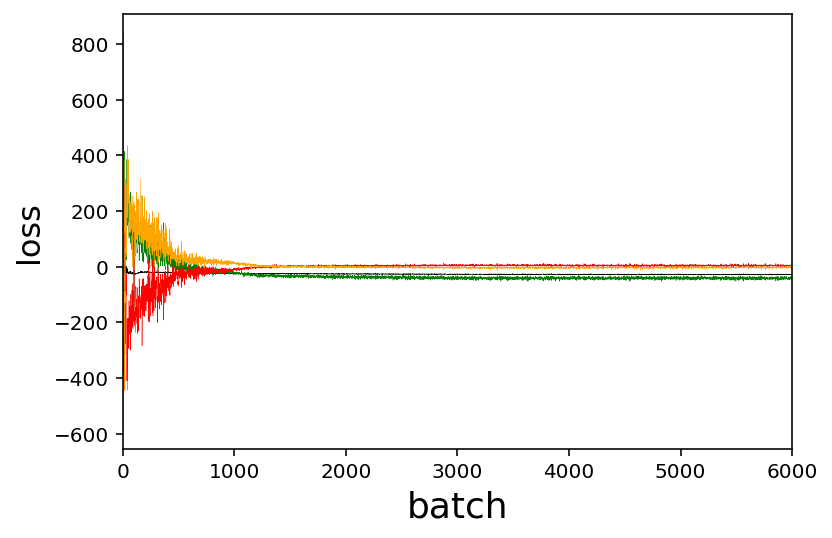

In [15]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, len(gan.d_losses))
# plt.ylim(0, 2)

plt.show()

#######

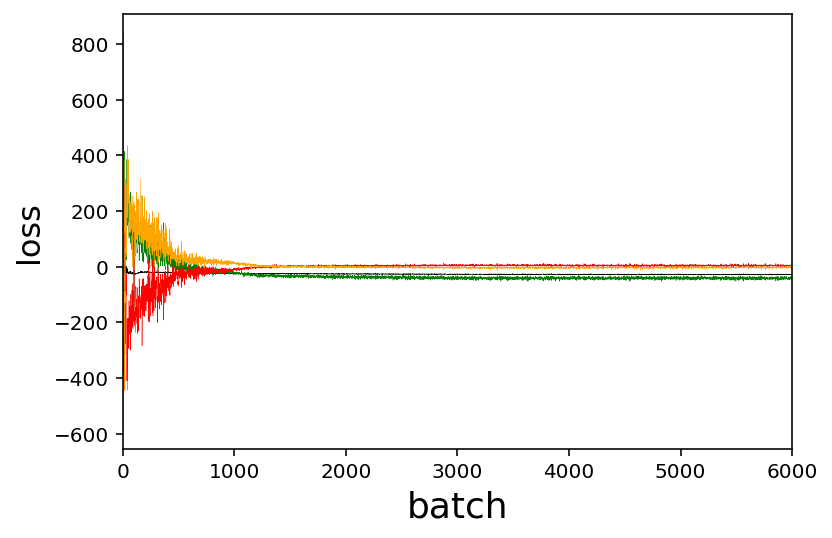

In [16]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, len(gan.d_losses))
# plt.ylim(0, 2)

plt.show()
